Goal : Find out where the company should put their focus, either on Mobile App or on Website.

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# Basic Imports

In [2]:
# Libraries for data analysis
import numpy as np
import pandas as pd
# Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('ecommerce_customers.csv')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
df = data.copy()  # Making the copy of the dataset

# Extracting the postal  code from the 'Address' feature
postal_code = []
for i in range(0, len(df.Address)):
    try:
        post = df.Address[i].split(', ')[1]
    except:
        post = 'None'
    postal_code.append(post.split(' ')[0])

df['Postal Code'] = pd.Series(postal_code)

# Extracting the email site from the 'Email' feture
df['Email Site'] = df.Email.apply(lambda x: x.split('@')[1].split('.')[0])
df['Email Site'] = df['Email Site'].apply(lambda x: 'others' if x not in ['gmail', 'hotmail', 'yahoo'] else x)
df.drop(['Email', 'Address'], axis=1, inplace=True)

df.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Postal Code,Email Site
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054,MI,others
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,CA,hotmail
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,DC,yahoo
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,OH,gmail
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,PR,others


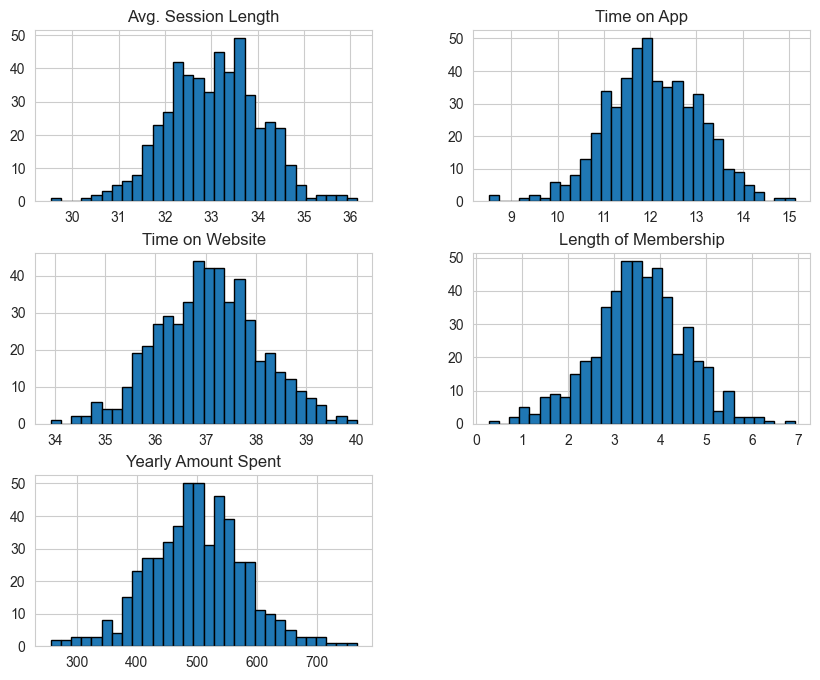

In [7]:
df.hist(bins=30, edgecolor='black', figsize=(10,8))
plt.show()

All the numeric data looks normaly distributed.

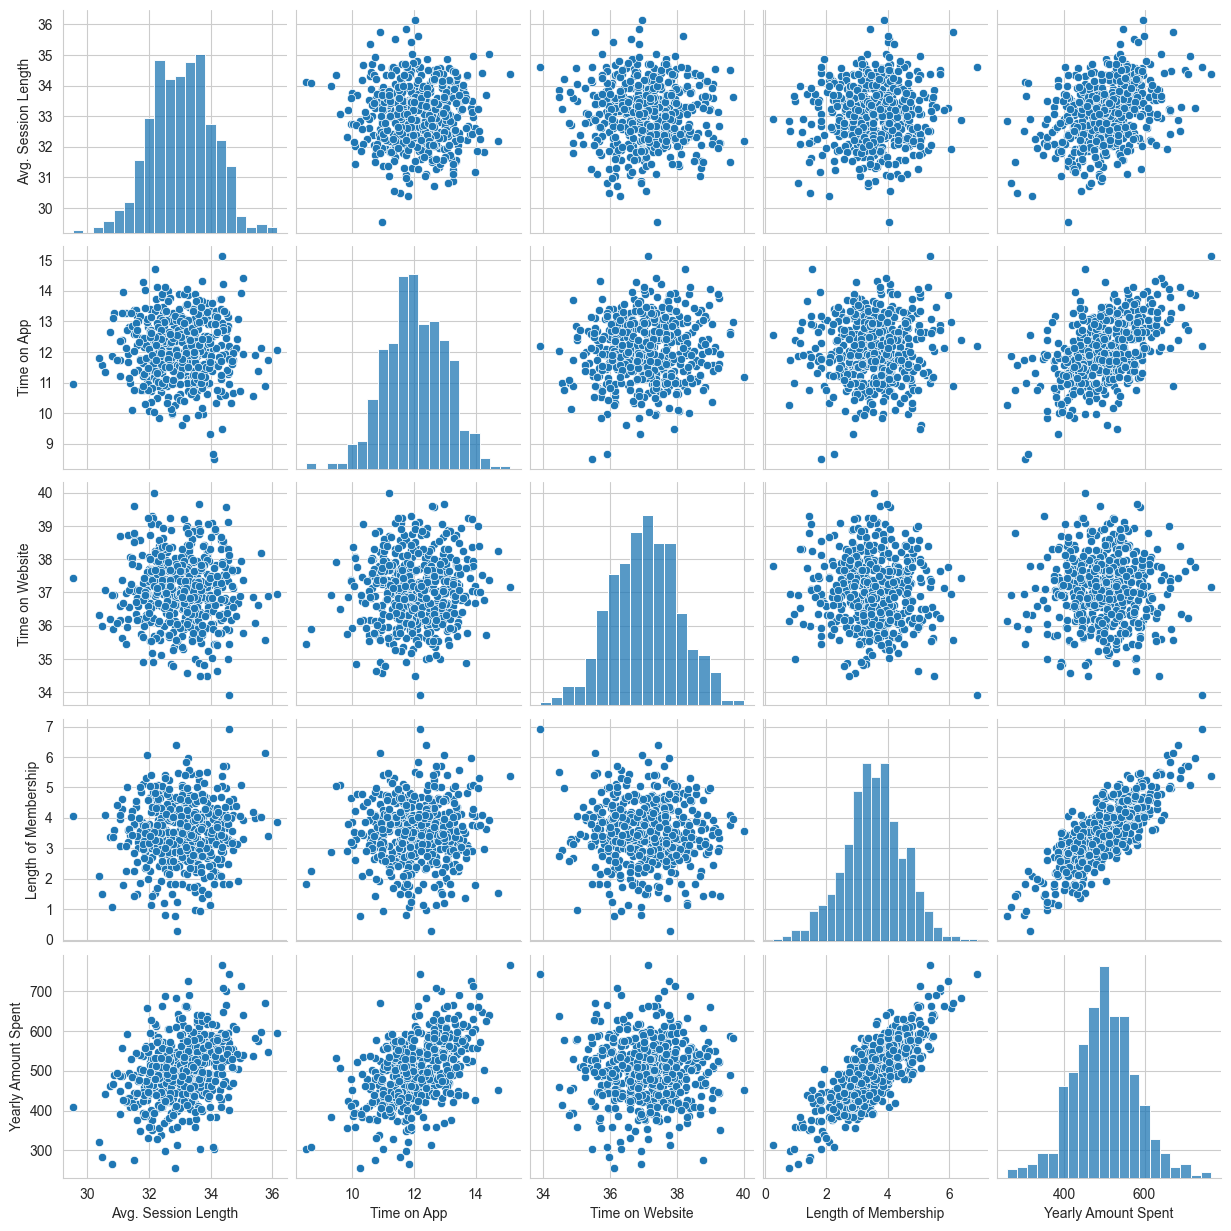

In [8]:
sns.pairplot(df)
plt.show()

'Time on App' and 'Length of Memebership' look most correlated with 'Yearly Amount Spent'

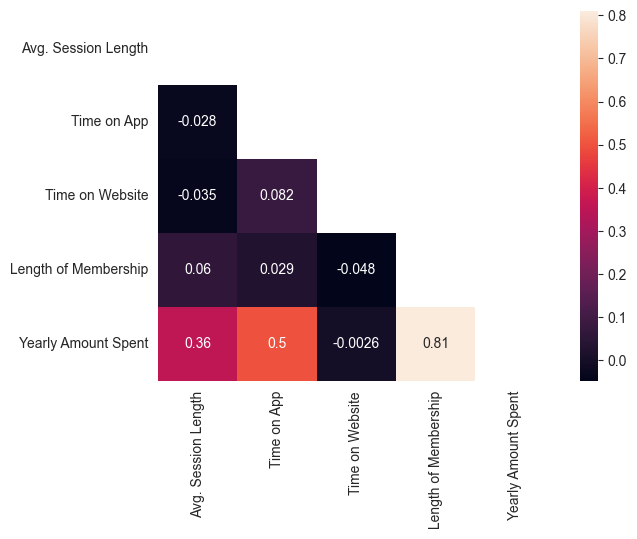

In [9]:
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix)
plt.show()

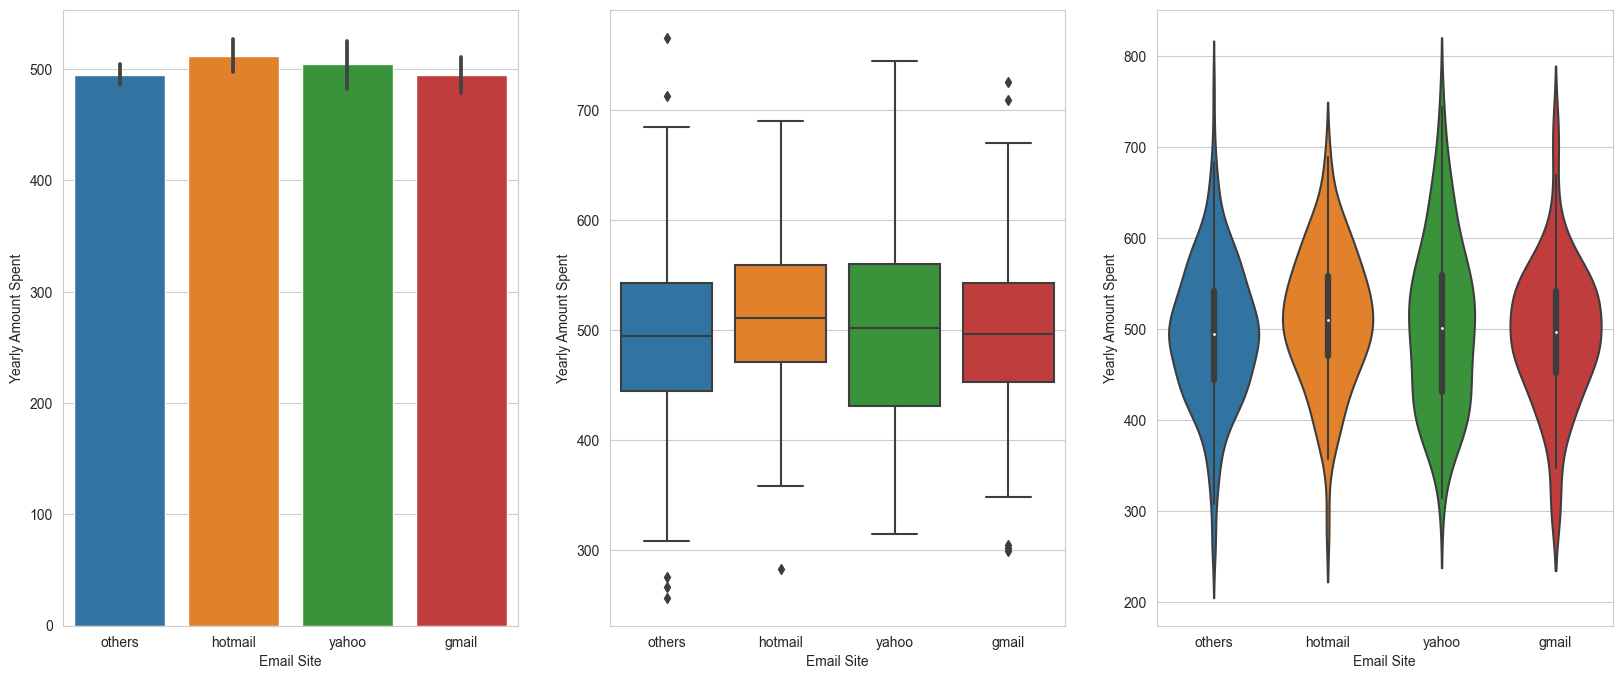

In [10]:
# Cheking the correlation of the 'Email Site' feature with the 'Yearly Amount Spent'
fig, axs = plt.subplots(ncols=3,figsize=(20,8))
sns.barplot(x='Email Site', y='Yearly Amount Spent', data=df, ax=axs[0])
sns.boxplot(x='Email Site', y='Yearly Amount Spent', data=df, ax=axs[1])
sns.violinplot(x='Email Site', y='Yearly Amount Spent', data=df, ax=axs[2])
plt.show()

The 'Yearly Amount Spent' looks same across all the values of 'Email Spent'. This feature doesn't look helpful.

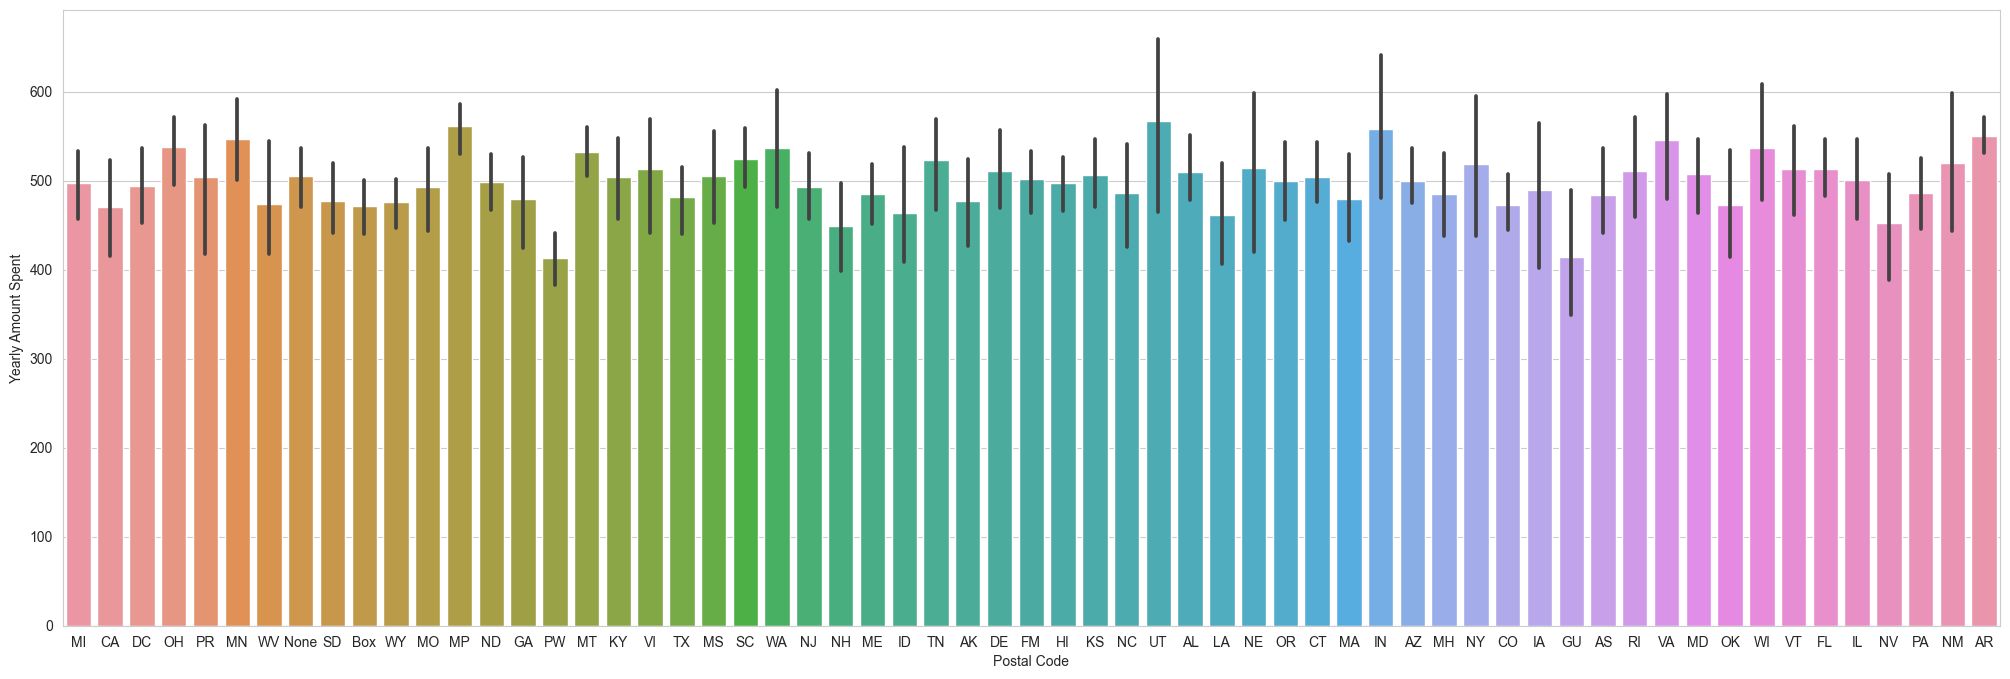

In [11]:
# Cheking the correlation between 'Postal Code' and 'Yearly Amount Spent'
plt.figure(figsize=(25,8))
sns.barplot(x='Postal Code', y='Yearly Amount Spent', data=df)
plt.show()

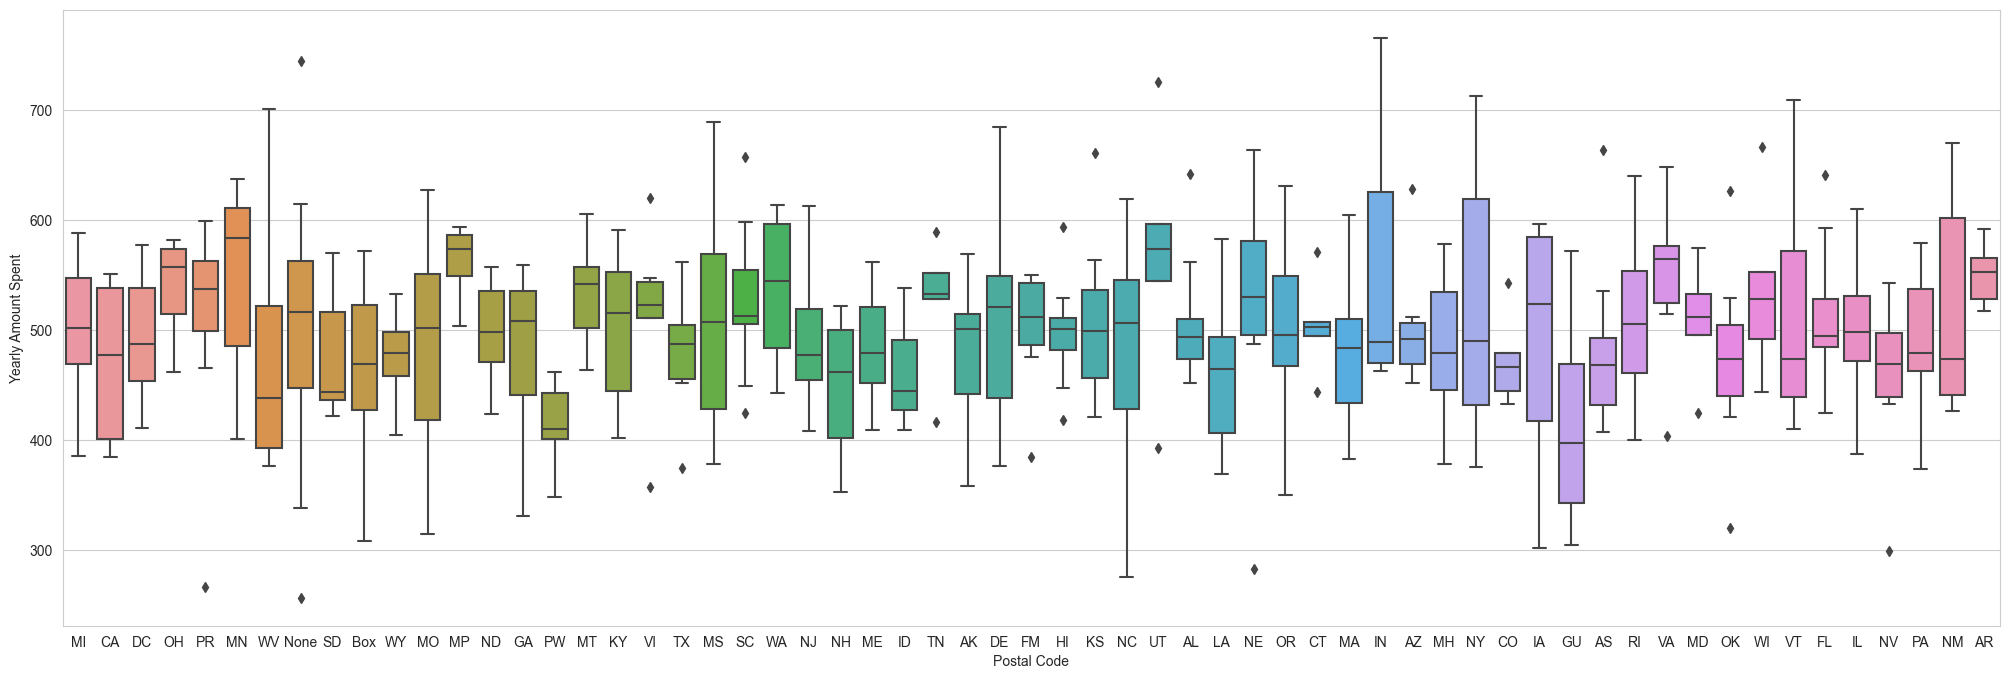

In [12]:
# Cheking the correlation between 'Postal Code' and 'Yearly Amount Spent' in the form of boxplot
plt.figure(figsize=(25,8))
sns.boxplot(x='Postal Code', y='Yearly Amount Spent', data=df)
plt.show()

there are some variations in correlation but it will not help us because of the large number of values in 'Postal Code'

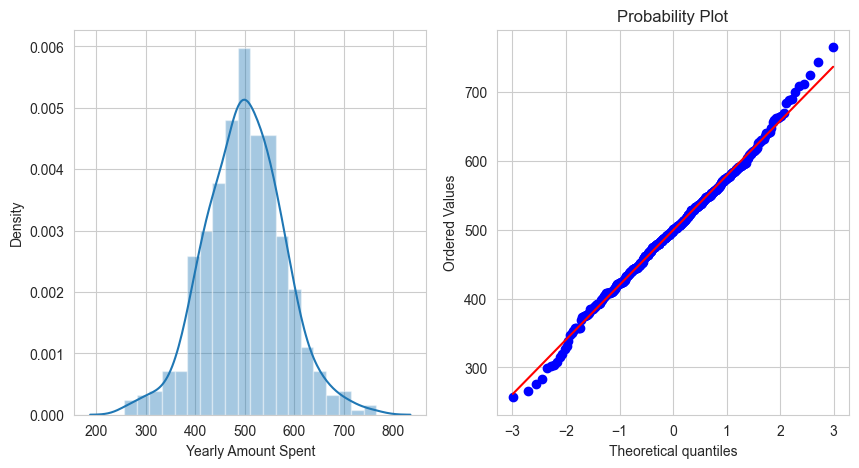

In [13]:
# Checking wheater our target is normally distributed or not.
from scipy import stats
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.distplot(df['Yearly Amount Spent'], ax=axs[0])
res = stats.probplot(df['Yearly Amount Spent'], plot=plt)
plt.show()

It seems like our target is normally distributed.

# Preprocessing for ML models

In [14]:
# Handling the categorical values and also dropping the 'Avatar' columns because it has no use in our modelling.
df = pd.get_dummies(df.drop('Avatar', axis=1), drop_first=True)
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Postal Code_AL,Postal Code_AR,Postal Code_AS,Postal Code_AZ,Postal Code_Box,...,Postal Code_VA,Postal Code_VI,Postal Code_VT,Postal Code_WA,Postal Code_WI,Postal Code_WV,Postal Code_WY,Email Site_hotmail,Email Site_others,Email Site_yahoo
0,34.497268,12.655651,39.577668,4.082621,587.951054,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,31.926272,11.109461,37.268959,2.664034,392.204933,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33.000915,11.330278,37.110597,4.104543,487.547505,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,34.305557,13.717514,36.721283,3.120179,581.852344,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33.330673,12.795189,37.536653,4.446308,599.406092,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Model Building

In [15]:
X = df.drop('Yearly Amount Spent', axis=1)
y = df['Yearly Amount Spent']

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold

# Choosing the best model among the tree based models
kfold = KFold(n_splits=4, shuffle=True, random_state=42)
scores = []
for i in [DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]:
    scores.append(np.mean(cross_val_score(i, X, y, cv=kfold)))
    
print(pd.DataFrame({'model':['Decision Tree','Random Forest', 'Gradient Boost'], 'score':scores}))

            model     score
0   Decision Tree  0.862999
1   Random Forest  0.939606
2  Gradient Boost  0.963277


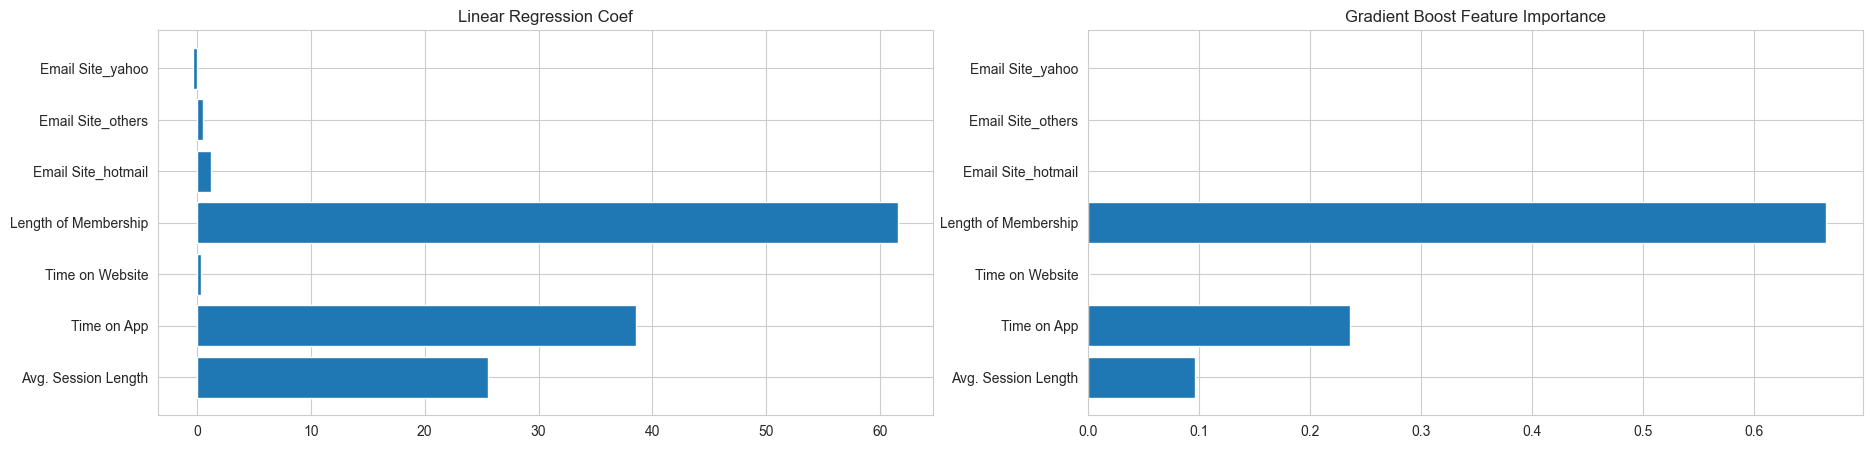

In [17]:
# Training both linear and tree based model
gboost = GradientBoostingRegressor().fit(X, y)
lr = LinearRegression().fit(X, y)

# Getting the coef for relevent features
coef = list(lr.coef_[:4]) + list(lr.coef_[-3:])
# Getting the feature importance for relevent features
fimp = list(gboost.feature_importances_[:4]) + list(gboost.feature_importances_[-3:])
# Getting the name of relevent features
feature_name = list(X.columns[:4]) + list(X.columns[-3:])

# Plotting the coef and feature importance
fig, axs = plt.subplots(ncols=2, figsize=(22,5))
axs[0].barh(feature_name, coef)
axs[0].set_title('Linear Regression Coef')

axs[1].barh(feature_name, fimp)
axs[1].set_title('Gradient Boost Feature Importance')
plt.show()

Conclusion : Both models and our data analysis shows thant 'Mobile App' generates more sales than 'Websites'. So company should enhance there user exp. on the website.